In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.models import Model
from keras.preprocessing import image

Using TensorFlow backend.


In [2]:
data = pd.read_csv("A_Z_data.csv").astype('float32')
data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X = data.iloc[:,1:].values
np.random.shuffle(X)
X.shape

(372450, 784)

In [4]:
X=X/255.0
X = X.reshape((len(X), 784)) #28*28=784

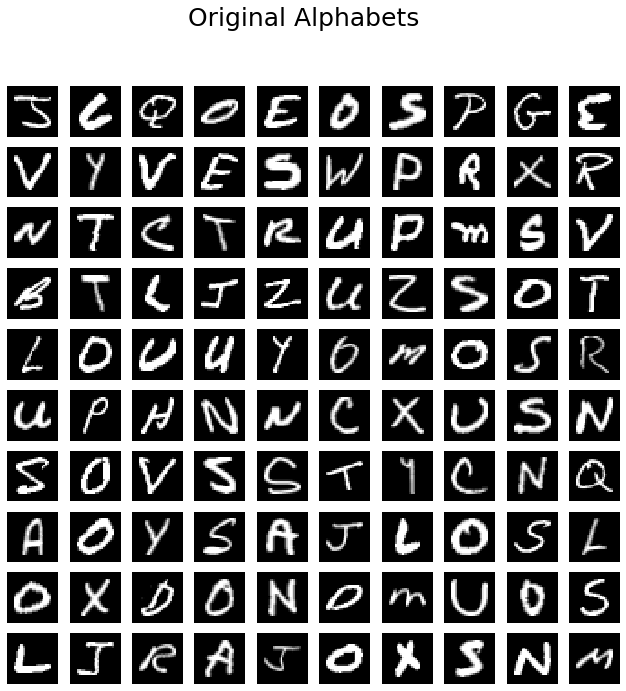

In [5]:
def show_data(X,height =28,width=28, title=""):
    plt.figure(figsize=(11,11))
    
    i = 1
    for img in X:
        plt.subplot(10, 10, i)
        plt.imshow(img.reshape((height, width)), cmap='gray')
        plt.axis('off')
        i+=1
        if i>100: break

    plt.suptitle(title, fontsize = 25)
    plt.show()
    
show_data(X, title="Original Alphabets")

In [6]:
X_train=X[0:25000]
X_test=X[25000:]

In [7]:
X_train.shape

(25000, 784)

In [8]:
input_dim=output_dim=784
hidden_dim=256
encode_dim=100

# Autoencoder Model

In [9]:
#encoder
input_layer = Input(shape=(input_dim,),name="INPUT")
hidden_layer_1 = Dense(hidden_dim,activation='relu',name="H1")(input_layer)

#Core
core_layer = Dense(encode_dim,activation='relu',name="CORE")(hidden_layer_1)

#decoder
hidden_layer_2 = Dense(hidden_dim,activation='relu',name="H2")(core_layer)
output_layer = Dense(output_dim,activation='sigmoid',name="OUTPUT")(hidden_layer_2)

In [10]:
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='binary_crossentropy')
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           (None, 784)               0         
_________________________________________________________________
H1 (Dense)                   (None, 256)               200960    
_________________________________________________________________
CORE (Dense)                 (None, 100)               25700     
_________________________________________________________________
H2 (Dense)                   (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, X_train, epochs=10)

Epoch 1/10
25000/25000 [==============================] - 3s 101us/step - loss: 0.1580
Epoch 2/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.1062
Epoch 3/10
25000/25000 [==============================] - 2s 89us/step - loss: 0.0987
Epoch 4/10
25000/25000 [==============================] - 2s 90us/step - loss: 0.0950
Epoch 5/10
25000/25000 [==============================] - 2s 90us/step - loss: 0.0928
Epoch 6/10
25000/25000 [==============================] - 2s 89us/step - loss: 0.0912
Epoch 7/10
25000/25000 [==============================] - 2s 88us/step - loss: 0.0901
Epoch 8/10
25000/25000 [==============================] - 2s 91us/step - loss: 0.0891
Epoch 9/10
25000/25000 [==============================] - 2s 90us/step - loss: 0.0885
Epoch 10/10
25000/25000 [==============================] - 2s 89us/step - loss: 0.0880


In [12]:
decoded_data = model.predict(X_test)

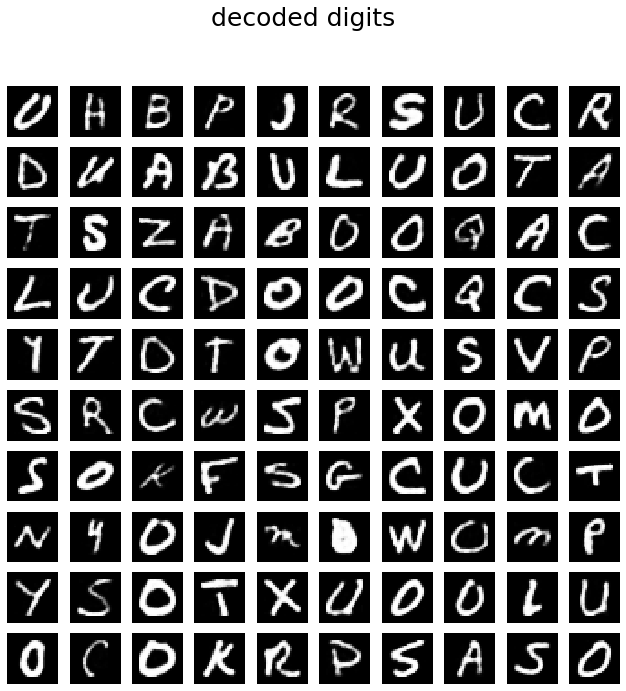

In [13]:
show_data(decoded_data,title='decoded digits')

In [14]:
model_encoded = Model(input_layer,core_layer)

In [15]:
encoded_data = model_encoded.predict(X_test)

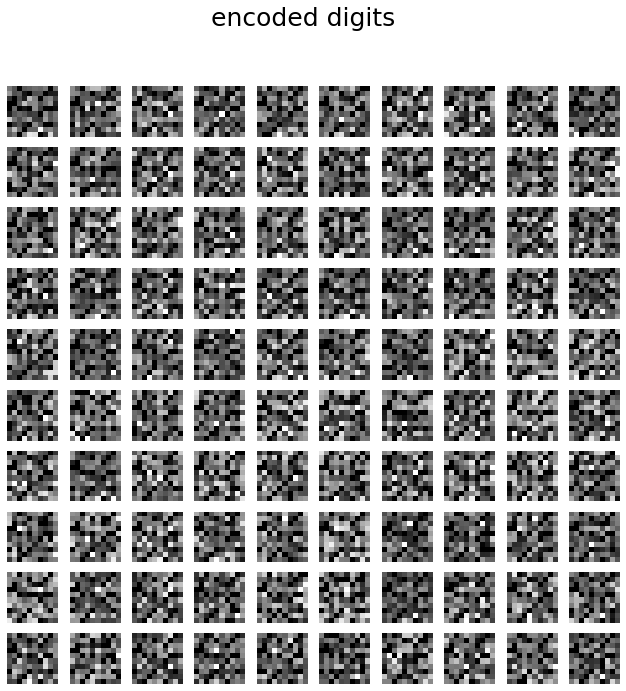

In [16]:
show_data(encoded_data,height=10,width=10,title='encoded digits')